In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

31.512104901381946 -144.37823958550928
38.07562033746268 -97.99426270828394
-29.14253681712814 -115.96964102645813
-31.457775191266705 -30.58557240676896
-33.89708830939206 -165.98297036658363
56.248735081989906 9.668238182653738
75.81213584250759 -11.520843494071187
28.920867754046597 -75.8671655170124
52.037096613279374 -124.53504057677209
-63.7101564208606 98.20158904124781
42.04394460456854 74.71687767125724
-7.949886813982047 -86.59196341705314
-22.740554544777325 172.98377465899904
-70.95052335289591 156.21345199643747
7.174110874008036 60.031049108749244
49.119782065921044 -152.47520300179175
-39.40836823165335 18.984587126677297
-6.3762190858112575 -158.88948583498512
13.71150750056303 -52.84467317243494
33.69599057509049 67.44731171222065
42.32034790460796 -76.92502095581979
20.471212569222743 -160.77377526928336
-19.410662262427138 -178.3900313610027
-19.35035354312329 28.107955682916042
-36.897275576471976 -13.859196625680681
78.3021401584347 69.51105520454291
-35.5485383120

13.94809515590299 -36.18589528888924
24.161145103235015 121.75003972815
-49.743996087793384 100.69139000709026
30.400690092374163 -160.11176231443793
22.448892094426654 -115.64060174554534
-36.62451938280253 -57.51770191310527
66.61909064186119 -42.317538663418674
20.005046748456834 141.8473101758613
-86.90846392547347 -2.559498269552762
4.211100702646945 109.48557086629046
-58.47449049810577 81.74551499981072
19.687843122229694 -166.1100648629332
-60.841555663195315 -35.47740726065442
77.25019883631987 92.81836338532861
-10.99339350570871 60.91765633804175
53.53817075342704 -111.96951891934606
32.857063054582994 139.89274280176608
-6.19411722286867 -123.21214694148358
-47.114059055005285 76.60368027321954
25.254886061101686 135.4081128967863
-1.6652535749342405 154.28487492204727
-9.390570598400231 132.7958879597091
1.6598274323497577 79.45874027535064
-45.80549909002239 -158.19593934002597
75.55187251848719 54.13771656407383
-18.387402059170725 168.85663672530137
80.46933295102366 13

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | hutchinson
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | svejbaek
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | marsh harbour
Processing Record 9 of Set 1 | vanderhoof
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | kant
Processing Record 12 of Set 1 | paita
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | panjab
Processing Record 21 of Set 1 | corning
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | vaini
Processing Reco

City not found. Skipping...
Processing Record 38 of Set 4 | maniitsoq
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | yuma
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | maarianhamina
Processing Record 46 of Set 4 | conceicao do araguaia
Processing Record 47 of Set 4 | abnub
Processing Record 48 of Set 4 | kenai
Processing Record 49 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 50 of Set 4 | villazon
Processing Record 1 of Set 5 | ishigaki
Processing Record 2 of Set 5 | dali
Processing Record 3 of Set 5 | walvis bay
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | hartford
Processing Record 7 of Set 5 | dosso
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | saint-pierre
Processing Record 10 of Set 5 | grand river

Processing Record 27 of Set 8 | santa cruz
Processing Record 28 of Set 8 | ondjiva
Processing Record 29 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 30 of Set 8 | wynyard
Processing Record 31 of Set 8 | knysna
Processing Record 32 of Set 8 | krasnogvardeyskoye
Processing Record 33 of Set 8 | evensk
Processing Record 34 of Set 8 | sobolevo
Processing Record 35 of Set 8 | concepcion del uruguay
Processing Record 36 of Set 8 | sambava
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | terrace
Processing Record 40 of Set 8 | dustlik
Processing Record 41 of Set 8 | douglas
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | ossora
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | higuey
City not found. Skipping...
Processing Record 48 of Set 8 | silkebo

Processing Record 15 of Set 12 | kosh-agach
Processing Record 16 of Set 12 | cuenca
Processing Record 17 of Set 12 | ocampo
Processing Record 18 of Set 12 | palmer
Processing Record 19 of Set 12 | le moule
Processing Record 20 of Set 12 | marawi
Processing Record 21 of Set 12 | kurdzhinovo
Processing Record 22 of Set 12 | moree
Processing Record 23 of Set 12 | ko samui
Processing Record 24 of Set 12 | mehamn
Processing Record 25 of Set 12 | havre-saint-pierre
Processing Record 26 of Set 12 | kincardine
Processing Record 27 of Set 12 | fougamou
Processing Record 28 of Set 12 | port hedland
Processing Record 29 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 30 of Set 12 | farafangana
Processing Record 31 of Set 12 | goure
Processing Record 32 of Set 12 | saint-joseph
Processing Record 33 of Set 12 | siparia
Processing Record 34 of Set 12 | akot
Processing Record 35 of Set 12 | gombong
Processing Record 36 of Set 12 | karoi
Processing Record 37 of Set 12 | ust-bar

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,84.27,86,20,5.75,US,2022-10-11 17:20:19
1,Hutchinson,38.0608,-97.9298,77.52,63,0,20.71,US,2022-10-11 17:22:45
2,Rikitea,-23.1203,-134.9692,70.92,74,13,6.51,PF,2022-10-11 17:25:12
3,Arraial Do Cabo,-22.9661,-42.0278,80.46,69,0,25.32,BR,2022-10-11 17:25:12
4,Avarua,-21.2078,-159.7750,71.65,100,100,21.85,CK,2022-10-11 17:25:13
5,Svejbaek,56.1325,9.6329,50.54,80,44,7.58,DK,2022-10-11 17:25:13
6,Husavik,66.0449,-17.3389,42.49,78,100,8.52,IS,2022-10-11 17:25:14
7,Marsh Harbour,26.5412,-77.0636,83.25,72,39,10.38,BS,2022-10-11 17:25:14
8,Vanderhoof,54.0166,-124.0198,48.92,55,78,9.08,CA,2022-10-11 17:25:14
9,Busselton,-33.6500,115.3333,52.32,69,64,9.53,AU,2022-10-11 17:25:15


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [26]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-10-11 17:20:19,19.7297,-155.0900,84.27,86,20,5.75
1,Hutchinson,US,2022-10-11 17:22:45,38.0608,-97.9298,77.52,63,0,20.71
2,Rikitea,PF,2022-10-11 17:25:12,-23.1203,-134.9692,70.92,74,13,6.51
3,Arraial Do Cabo,BR,2022-10-11 17:25:12,-22.9661,-42.0278,80.46,69,0,25.32
4,Avarua,CK,2022-10-11 17:25:13,-21.2078,-159.7750,71.65,100,100,21.85
5,Svejbaek,DK,2022-10-11 17:25:13,56.1325,9.6329,50.54,80,44,7.58
6,Husavik,IS,2022-10-11 17:25:14,66.0449,-17.3389,42.49,78,100,8.52
7,Marsh Harbour,BS,2022-10-11 17:25:14,26.5412,-77.0636,83.25,72,39,10.38
8,Vanderhoof,CA,2022-10-11 17:25:14,54.0166,-124.0198,48.92,55,78,9.08
9,Busselton,AU,2022-10-11 17:25:15,-33.6500,115.3333,52.32,69,64,9.53


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

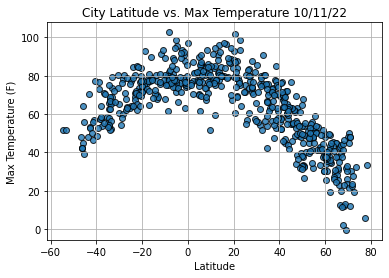

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

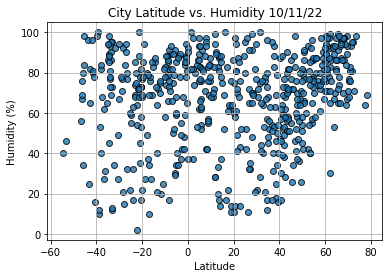

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

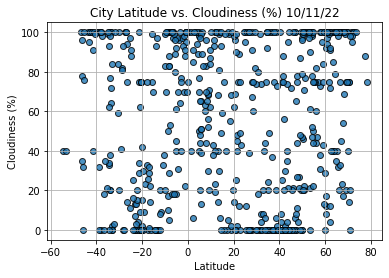

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

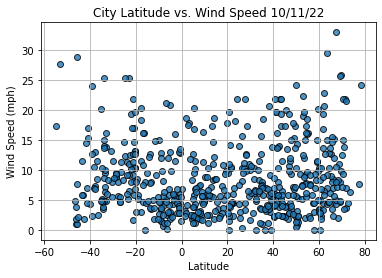

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()